In [1]:
%load_ext autoreload
%autoreload 2

In [44]:
from app.dataset.panoptic.joints import load_joints
from app.dataset.panoptic.camera import load_camera_matrix, get_camera_calibs, load_calib, list_hd_cameras
from pathlib import Path
import torch
import numpy as np
import matplotlib.pyplot as plt

clip_path = Path("/home/juanpablo/cv_datasets/171204_pose3/")

# camera_names = list_hd_cameras(clip_path)
camera_name = "00_00"

calib = load_calib(clip_path)
camera_calibs = get_camera_calibs(calib)

camera_calib = camera_calibs[camera_name]
P4 = load_camera_matrix(camera_calib)

all_joints = load_joints(clip_path)

from app.dataset.panoptic.images import load_image

frame_index = 300
image = load_image(clip_path, camera_name, frame_index)

camera_name, P4.shape, image.shape

('00_00', (3, 4), torch.Size([3, 1080, 1920]))

(3, 19)

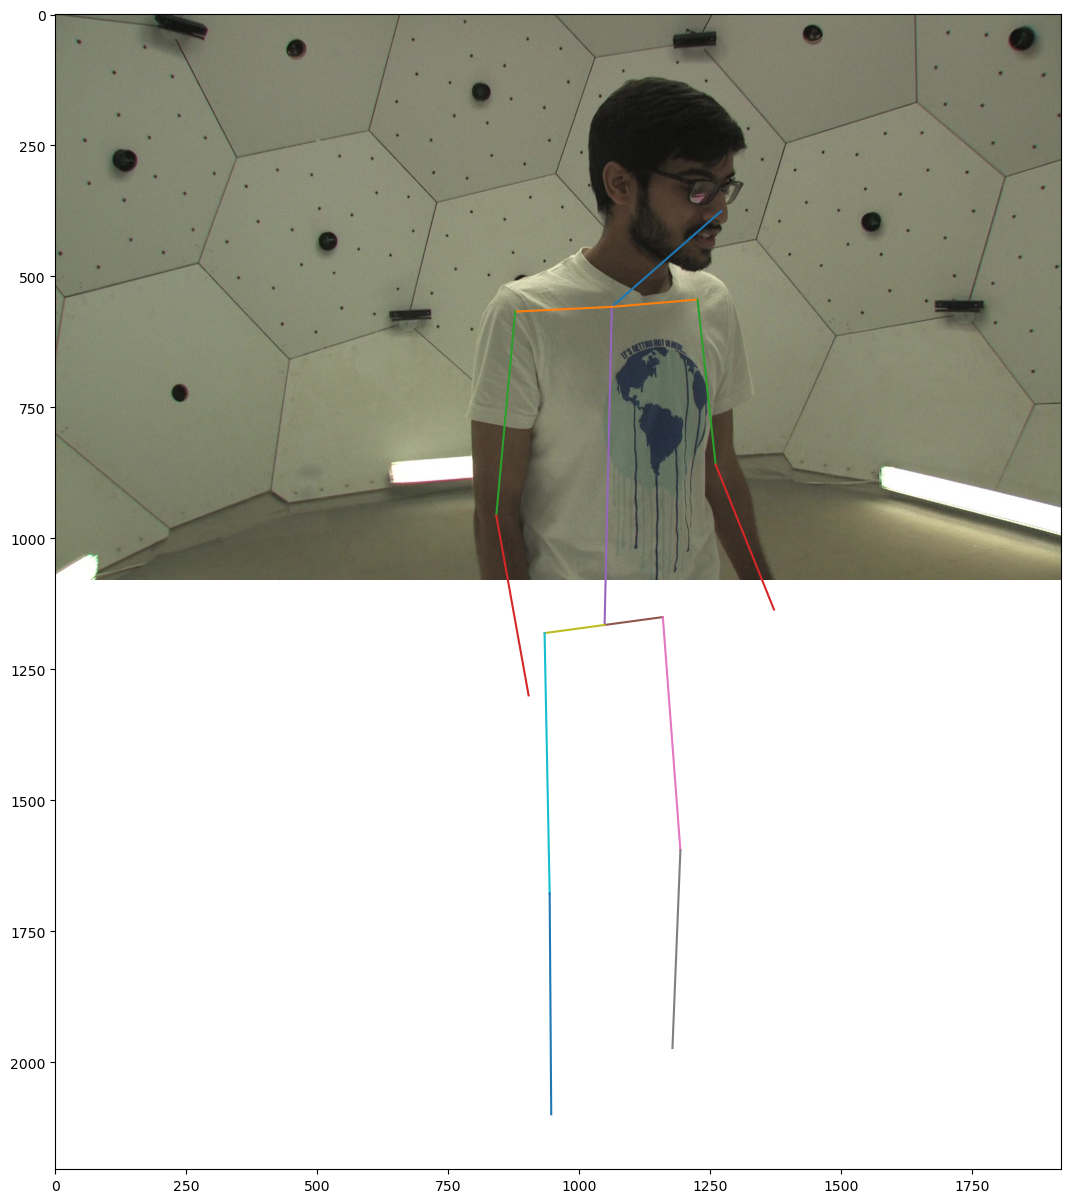

In [48]:
joints = list(all_joints[frame_index].values())[0]
joints = joints.T
joints[3, :] = 1

def display_points(x):
    x_homo = P4 @ x
    x_proj = x_homo[:, :] / x_homo[2:3, :]

    body_edges = np.array([[1,2],[1,4],[4,5],[5,6],[1,3],[3,7],[7,8],[8,9],[3,13],[13,14],[14,15],[1,10],[10,11],[11,12]])-1

    plt.figure(figsize=(15,15))
    plt.imshow(torch.permute(image, (1, 2 ,0)))

    for edge in body_edges:
        plt.plot(x_proj[0, edge], x_proj[1, edge])

    return x_proj

projected_points = display_points(joints)
projected_points.shape

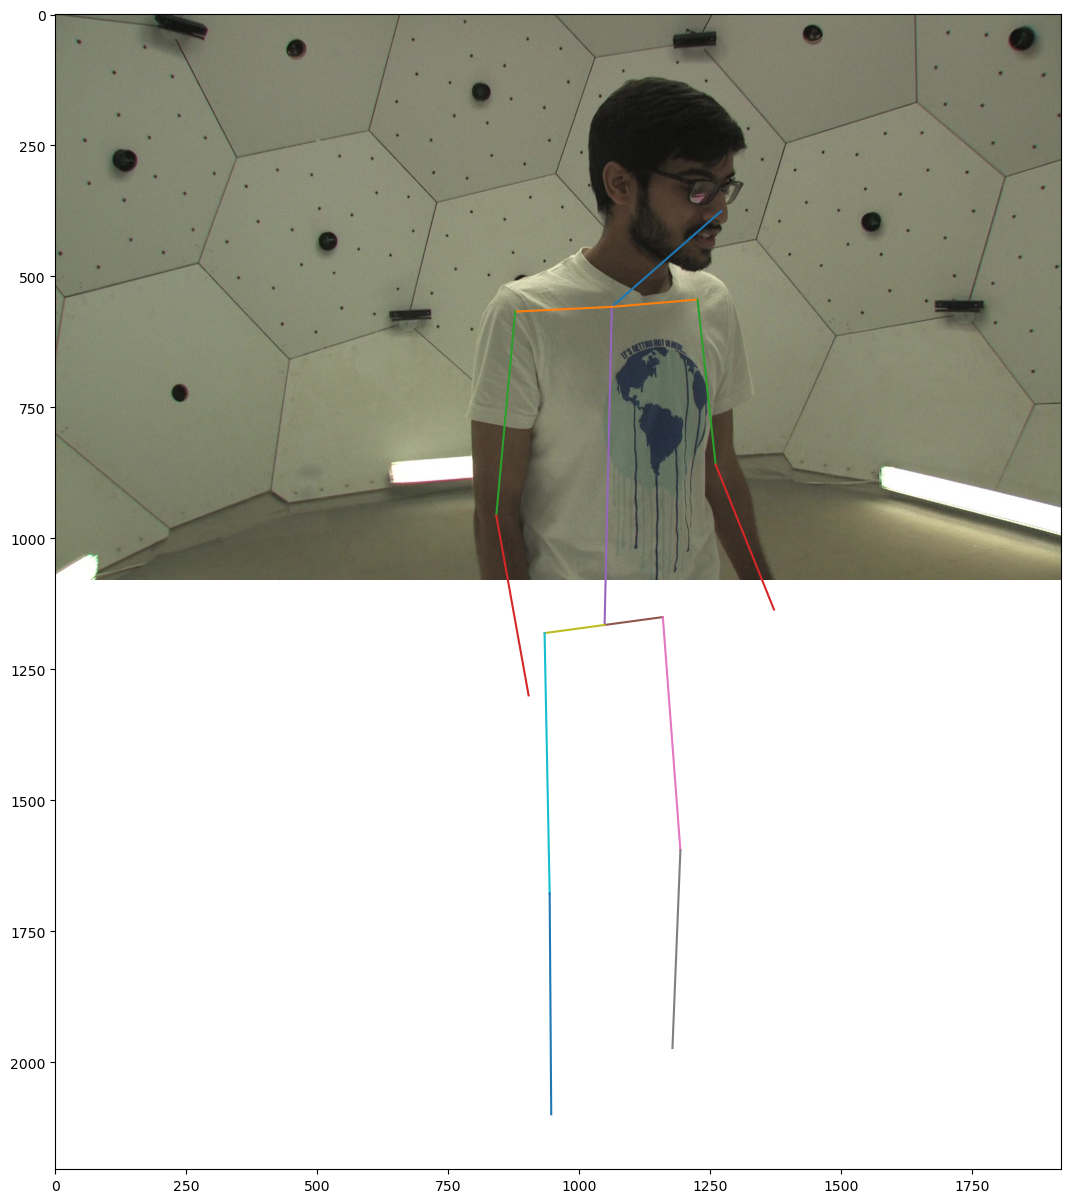

In [49]:
invP4 = np.linalg.pinv(P4)
inv_joints = invP4 @ projected_points
_ = display_points(inv_joints)


In [65]:
from app.dataset.panoptic.flat_panoptic_clip import FlatPanopticClip

flat_panoptic_clip = FlatPanopticClip(clip_path)
len(flat_panoptic_clip)

flat_panoptic_clip[0]["image"].shape

torch.Size([3, 1080, 1920])